# Lab 2 (Due @ by 11:59 pm via Canvas/Gradescope)

Your Name: Diego Cicotoste

Due: Wednesday or Thursday, Oct. 2/3 @ 11:59 pm

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope. **In addition:**
- Make sure your name is entered above
- Make sure you comment your code effectively
- If problems are difficult for the TAs/Profs to grade, you will lose points

### Tips for success
- Collaborate: bounce ideas off of each other, if you are having trouble you can ask your classmates or Dr. Gerber for help with specific issues, however...
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), i.e. you are welcome to **talk about** (*not* show each other your answers to) the problems.

In [19]:
# you might use the below modules on this lab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Part 1: Understanding Cleaning
### Part 1.1: Grabbing Data and Preliminary Cleaning (10 points)

We wish to create a data frame that includes all the spells for each class (a "class" is something like a "wizard", or a "bard") in Dungeons and Dragons 5th Edition, which you can find [here](http://dnd5e.wikidot.com/). Your final data frame should look something like:

| Class     | Level     | Spell Name    | School      | Casting Time | Range                | Duration      | Components |
|----------:|----------:|--------------:|------------:|-------------:|---------------------:|--------------:|-----------:|
| Artificer | Level 0   | Acid Splash   | Conjuration | 1 Action     | 60 Feet              | Instantaneous | V, S       |
| Artificer | Level 0   | Booming Blade | Evocation   | 1 Action     | Self (5-foot radius) | 1 Round       | S, M       |
| ...       | ...       | ...           | ...         | ...          | ...                  | ...           | ...        |
| Wizard    | Level 9   | Wish          | Conjuration | 1 Action     | Self                 | Instantaneous | V          |

Below are two functions which:
- takes a class (string) as an argument and returns the tables from the class's DND wiki spell page in a dictionary for each spell level
- takes a list of classes, applies the first function to each of them, then combines all the tables into a data frame, including a column with class name and a column with spell level

**DO NOT CHANGE ANYTHING IN THE BODY OF THE FUNCTIONS.**

**In a markdown cell** create a bullet point list where you explain each what each chunk of code does. Your bullet point list should have **FIVE** bullet points/explanations corresponding to the four chunks below the `# EXPLAIN THIS (number)` comments. You must accurately summarize the content and procedure of each code chunk. **Talking to your neighbors/group about this is highly recommended.**

In [20]:
def get_class_spell_dict(dnd_class):
    """ takes a D&D class (string) and gets the spell tables and saves them in a dictionary
    
    Args:
        dnd_class (str): the D&D class
        
    Returns:
        table_dict (dict): a dictionary of tables, one for each spell level
    """

    # EXPLAIN THIS (1)
    url = f'http://dnd5e.wikidot.com/spells:{dnd_class}'
    tables = pd.read_html(url)
    table_dict = {}
    for i in range(len(tables)):
        table_dict[f'Level {i}'] = tables[i]

    return table_dict

def get_full_spell_df(class_list):
    """ takes a list of D&D classes (list of strings), applies the get_class_spell_dict() function to them, and then combines them into a data frame

    Args:
        class_list (list): a list of strings

    Returns:
        spells_df (data frame): a data frame with all the spells
    """

    spells_df = pd.DataFrame()
    level_list = []
    long_class_list = []
    
    # EXPLAIN THIS (2)
    for class_ in class_list:
        class_dict = get_class_spell_dict(class_)
        class_df = pd.DataFrame()

        # EXPLAIN THIS (3)
        for level in class_dict:
            level_list.append([level] * len(class_dict[level]))
            class_df = pd.concat([class_df, class_dict[level]])

        # EXPLAIN THIS (4)
        long_class_list.append([class_] * len(class_df))
        spells_df = pd.concat([spells_df, class_df])

    # EXPLAIN THIS (5)
    spells_df.insert(0, 'Level', [item for sublist in level_list for item in sublist])
    spells_df.insert(0, 'Class', [item for sublist in long_class_list for item in sublist])
    
    return spells_df

class_list = ['Artificer', 'Bard', 'Cleric', 'Druid', 'Paladin', 'Ranger', 'Sorcerer', 'Warlock', 'Wizard']
notclean_df = get_full_spell_df(class_list)
notclean_df

,Class,Level,Spell Name,School,Casting Time,Range,Duration,Components
0,Artificer,Level 0,Acid Splash,Conjuration,1 Action,60 Feet,Instantaneous,"V, S"
1,Artificer,Level 0,Booming Blade,Evocation,1 Action,Self (5-foot radius),1 round,"S, M"
2,Artificer,Level 0,Create Bonfire,Conjuration,1 Action,60 Feet,"Concentration, up to 1 minute","V, S"
3,Artificer,Level 0,Dancing Lights,Evocation,1 Action,120 feet,Concentration up to 1 minute,"V, S, M"
4,Artificer,Level 0,Fire Bolt,Evocation,1 Action,120 feet,Instantaneous,"V, S"
...,...,...,...,...,...,...,...,...
13,Wizard,Level 9,Time Ravage,Necromancy DC,1 Action,90 feet,Instantaneous,"V, S, M"
14,Wizard,Level 9,Time Stop,Transmutation,1 Action,Self,Instantaneous,V
15,Wizard,Level 9,True Polymorph,Transmutation,1 Action,30 feet,"Concentration, up to 1 hour","V, S, M"
16,Wizard,Level 9,Weird,Illusion,1 Action,120 feet,"Concentration, up to 1 minute","V, S"


Your answers here:

- Getting the URL and scrapping the datad from the table
- Going inside the class list and getting each spell in each class
- Going inside the class dict made from EXPLAIN 2 and getting the level for each spell
- Gets the corrected class and appends it to the spells df 
- Creates Collumn for Level and Class each filling out the information in their respected places

### Part 1.2: More Cleaning (15 points)

The "final" data frame from the previous part is still not as clean as it could be. In a markdown cell, perform these two tasks:

1. Write a short paragraph (at least four sentences) discussing what else you would do to continue cleaning up the data
2. Think about the `Components` column specifically, write out some pseudo code (you can see how I did the below example by double clicking on this cell) that roughly outlines how you would go about cleaning that column

```
def my_cleaning_func(column):
    """ this function cleans a column from a data frame

    Args: column (Series)

    Returns: clean_column (Series)
    """

    # take the column
    # clean the column (I have written comments for these steps, YOU SHOULD WRITE PSEUDO-CODE)
    # save it as clean_column

    return clean_column
```

Your answers here:

After further observation there are a couple of duplicates that I would consider removing. Next I would add a couple things to be caution about, like removing special characters if any, filling missing or null values with N/A. I would ensure as well that all the collumns are cleaned up, making sure there is no trailing spacing or anything.

```
def clean_components(column):
    """
    This function cleans the 'Components' column from a data frame.
    
    Args: 
        column (Series): The 'Components' column to be cleaned.

    Returns:
        clean_column (Series): The cleaned 'Components' column.
    """
    
    Remove any duplicate rows
    Remove any characters not needed
    Split many companents entries into lists
    Handle any missing or null values, by filing them with N/A
    Converting the Components into words
    
    return clean_column
```

# Part 2: Summarizing and Visualizing Data

This problem uses `evdataset.csv`, available in the Labs Module on Canvas, which was taken and adapted from Kaggle (no longer hosted) and contains a sample of 194 electric vehicles on the market until 2022. The full dataset includes basic technical specifications, battery capacity and range in various weather and road conditions.

In [21]:
df_ev = pd.read_csv('evdataset.csv', index_col='id')
df_ev.head()

,drive,acceleration,topspeed,electricrange,totalpower,totaltorque,batterycapacity,chargespeed,length,width,height,wheelbase,grossweight
id,,,,,,,,,,,,,
1647,Rear,7.8,185,390,168,350,77.4,49,4515,1890,1580,2900,2495
1493,AWD,6.2,160,330,215,520,69.7,46,4684,1834,1701,2829,2580
1229,AWD,3.2,260,415,500,850,93.4,46,4963,1966,1381,2900,2880
1252,Rear,5.7,190,470,250,430,83.9,54,4783,1852,1448,2856,2605
1534,Rear,7.9,160,450,150,310,82.0,55,4261,1809,1568,2771,2300


## Part 2.1: Numeric Summaries (25 points)

On your own or with a classmate, discuss which features you think would be most interesting to compare across different drives. Pick two or three of them and, after using `.groupby()` to group by the `drive` feature, calculate for all of them:

- means
- medians
- standard deviations

Then, using the original data set, look at the pairwise correlations (with the correlation matrix, check out the [`pd.corr()` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)). Finally, **in a markdown cell** discuss your key takeaways from the numeric summaries you calculated, and what the correlations were between your chosen features. Where they among the strongest/weakest relationships? Do you think the type of drive may impact these relationships? Any other interesting results of note?


In [22]:
grouped_df = df_ev.groupby('drive').agg({
    'acceleration': ['mean', 'median', 'std'],
    'topspeed': ['mean', 'median', 'std'],
    'totalpower': ['mean', 'median', 'std']
})
grouped_df

acceleration                     topspeed                    totalpower  \
              mean median       std        mean median        std        mean   
drive                                                                           
AWD       4.972000    4.8  1.272321  209.813333  205.0  31.569611  328.706667   
Front    10.894521   11.7  2.459725  143.630137  135.0  15.394359  109.904110   
Rear      7.797826    7.9  1.367478  176.521739  160.0  24.695244  173.304348   

                          
      median         std  
drive                     
AWD    320.0  107.356035  
Front  100.0   25.004535  
Rear   150.0   61.280727

In [23]:
correlation_matrix = grouped_df[['acceleration', 'topspeed', 'totalpower']].corr()
correlation_matrix

acceleration                      topspeed            \
                            mean    median       std      mean    median   
acceleration mean       1.000000  0.999485  0.911028 -0.999553 -0.982026   
             median     0.999485  1.000000  0.923795 -0.998079 -0.975461   
             std        0.911028  0.923795  1.000000 -0.898299 -0.816825   
topspeed     mean      -0.999553 -0.998079 -0.898299  1.000000  0.987228   
             median    -0.982026 -0.975461 -0.816825  0.987228  1.000000   
             std       -0.998201 -0.999611 -0.934113  0.995963  0.968942   
totalpower   mean      -0.965209 -0.956318 -0.771512  0.972592  0.997213   
             median    -0.945560 -0.934626 -0.727235  0.954863  0.989991   
             std       -0.995492 -0.991934 -0.867811  0.997882  0.995501   

                              totalpower                      
                          std       mean    median       std  
acceleration mean   -0.998201  -0.965209 -0.945560 -0.995492  
             median -0.999611  -0.956318 -0.934626 -0.991934  
             std    -0.934113  -0.771512 -0.727235 -0.867811  
topspeed     mean    0.995963   0.972592  0.954863  0.997882  
             median  0.968942   0.997213  0.989991  0.995501  
             std     1.000000   0.947794  0.924345  0.988014  
totalpower   mean    0.947794   1.000000  0.997761  0.985658  
             median  0.924345   0.997761  1.000000  0.972165  
             std     0.988014   0.985658  0.972165  1.000000

At first we can notice a pattern that from the top left to the bottom left there is a diagonal of the same integers, however as we look away from it the numbers change drastically. This could be due to the fact that we are comparing some smaller numbers like acceleration which are usualy 1-6 to totalpower that goes into the hundreadths.

## Part 2.2: Visual Summaries (25 points)

Again choose two or three features (they can be the same or different as those from the previous part) and make a few plots to further your understanding of the data. For the first two plots, you may use any of `matplotlib`, `seaborn` or `plotly` (you may find some easier to use than others). Please make:

- Histograms for each drive type (i.e. three histograms, one for each of: AWD, Front, Rear) for one of your chosen features. You may make them separately or within a subplot.
- A scatterplot of two of your features, with points colored by drive type.
- Check out the [seaborn plot options again](https://seaborn.pydata.org/examples/index.html) and pick one to use with your chosen features (exercise some thought as to what you are hoping the plot will communicate; you may find it worthwhile to discuss options with your classmates).

Then, **in a markdown cell** discuss what you learned from the plots you created. If you used the same features that you investigated numerically, did the plots corroborate your findings? Or did they provide new insight? If you used new features, what do the plots tell you about what the numeric reationship(s) between the features might be? Ay other interesting results to note?

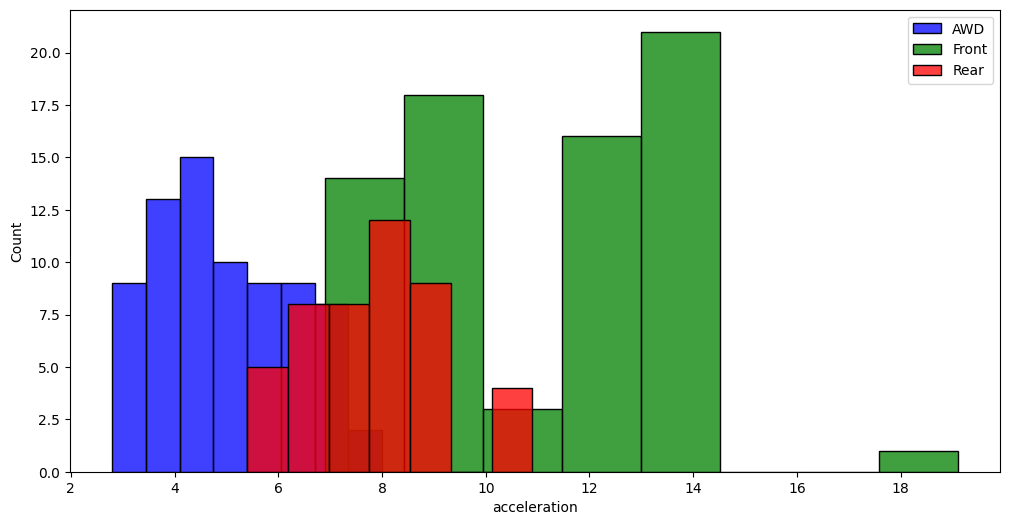

In [24]:
chosen = 'acceleration'  
x = 'totalpower'  
y = 'topspeed'  

plt.figure(figsize=(12, 6))
sns.histplot(df_ev[df_ev['drive'] == 'AWD'][chosen], color='blue', label='AWD')
sns.histplot(df_ev[df_ev['drive'] == 'Front'][chosen], color='green', label='Front')
sns.histplot(df_ev[df_ev['drive'] == 'Rear'][chosen], color='red', label='Rear')
plt.legend()
plt.show()



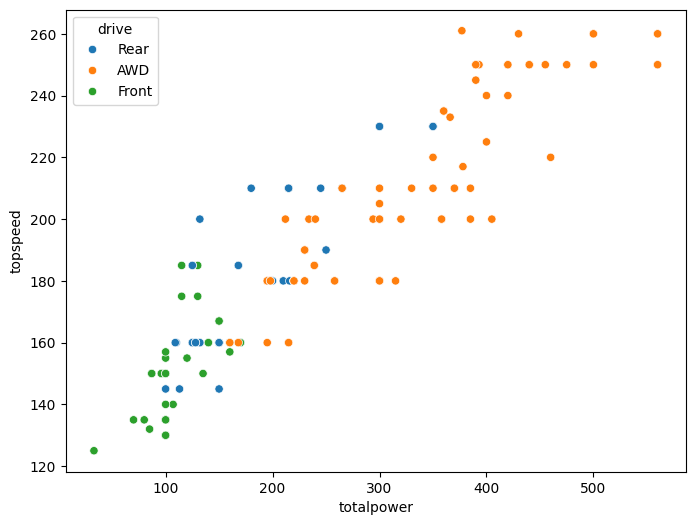

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ev, x=x, y=y, hue='drive')
plt.show()

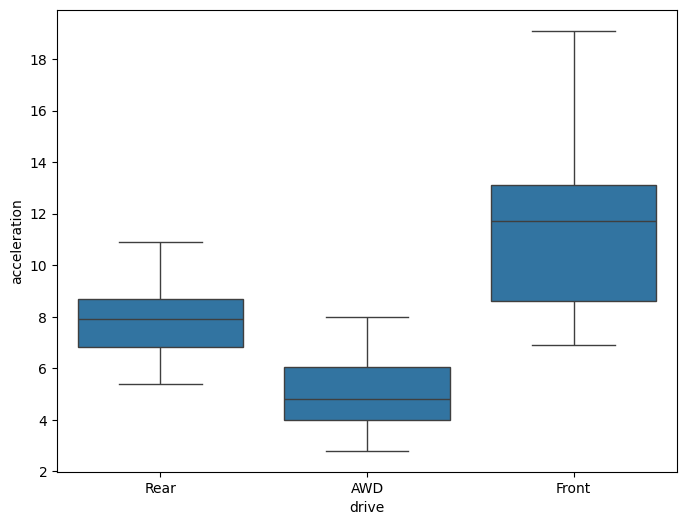

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_ev, x='drive', y=chosen)
plt.show()

All the plot shows that AWD vehicles have a better performance wether it coems to aceleration or top speed. The plot that shows most of the AWD impressive performance in the scatter plot where its performance is way above any other. Clearly showcasing that AWD is the best one then rear then front. The boxplot also supported this by showing AWD cars have the highest median top speed. Overall, the visuals made it clear that AWD vehicles outperform the others in key performance metrics.

## Part 2.3: Future Considerations (25 points)

Explicitly calculate the variance of all the numeric features in the raw `df_ev` data set, as well as the covariance matrix. Then, in a few sentences (**in a markdown cell**) discuss in detail (a) why some variances are larger than others, (b) why the covariances between the different features are not as useful as the correlations you calculated in Part 2.1 (**pick a couple** of example relationships to illustrate the point(s) you make, and (c) if the relationships we see between the features based on the correlation matrix from Part 2.1 are necessarily the true relationships between those features.

In [27]:
num_types = df_ev.select_dtypes(include=['float', 'int'])

variance = num_types.var()

covariance_matrix = num_types.cov()

correlation_matrix = num_types.corr()

In [28]:
print("Variance of Numeric Features:")
print(variance)

print("\nCovariance Matrix:")
print(covariance_matrix)

print("\nCorrelation Matrix:")
correlation_matrix

Variance of Numeric Features:
acceleration           10.038666
topspeed             1452.388361
electricrange       10278.791865
totalpower          15114.115913
totaltorque         49382.359810
batterycapacity       404.922219
chargespeed           243.919369
length             143049.769483
width                4722.348486
height              23179.887319
wheelbase           56914.286977
grossweight        172716.918354
dtype: float64

Covariance Matrix:
                 acceleration     topspeed  electricrange    totalpower  \
acceleration        10.038666  -105.351875    -227.482493   -325.912451   
topspeed          -105.351875  1452.388361    2730.560734   4320.033278   
electricrange     -227.482493  2730.560734   10278.791865   7944.660809   
totalpower        -325.912451  4320.033278    7944.660809  15114.115913   
totaltorque       -552.506025  7024.237968   13834.925218  24749.795577   
batterycapacity    -36.213742   509.695970    1760.754834   1728.165045   
chargespeed   

,acceleration,topspeed,electricrange,totalpower,totaltorque,batterycapacity,chargespeed,length,width,height,wheelbase,grossweight
acceleration,1.000000,-0.872495,-0.708172,-0.836703,-0.784717,-0.568002,-0.405163,0.009513,-0.220777,0.738645,0.239264,-0.054268
topspeed,-0.872495,1.000000,0.706707,0.922050,0.829415,0.664636,0.284501,0.244581,0.440627,-0.676073,-0.006390,0.251085
electricrange,-0.708172,0.706707,1.000000,0.637401,0.614073,0.863062,0.415019,0.219826,0.277975,-0.540106,0.061227,0.269258
totalpower,-0.836703,0.922050,0.637401,1.000000,0.905929,0.698567,0.184997,0.346570,0.526707,-0.533154,0.114506,0.394406
totaltorque,-0.784717,0.829415,0.614073,0.905929,1.000000,0.713692,0.132464,0.347060,0.496185,-0.422316,0.169585,0.433598
batterycapacity,-0.568002,0.664636,0.863062,0.698567,0.713692,1.000000,0.100640,0.564253,0.610476,-0.215981,0.422128,0.656627
chargespeed,-0.405163,0.284501,0.415019,0.184997,0.132464,0.100640,1.000000,-0.409204,-0.327037,-0.566495,-0.450205,-0.353369
length,0.009513,0.244581,0.219826,0.346570,0.347060,0.564253,-0.409204,1.000000,0.859018,0.367423,0.900007,0.907587
width,-0.220777,0.440627,0.277975,0.526707,0.496185,0.610476,-0.327037,0.859018,1.000000,0.212197,0.734512,0.853959
height,0.738645,-0.676073,-0.540106,-0.533154,-0.422316,-0.215981,-0.566495,0.367423,0.212197,1.000000,0.576104,0.391405


Some rows have bigger gaps because of their higher values, specifically totalpower. Covirances are harder to interpet than the others becaues the are affected by the scales of the variables. Correlations are standarized and show how strongly some of the features are alike.




